# Badanie splątania stanów na przykładzie par EPR

## Analiza algebraiczna

### Pożyteczne funkcje

In [1]:
import numpy as np

def Ket(x, *args):
    """
    Creates a column vector representation of the ket |x⟩ as an np.matrix.

    - Converts the arguments (x, *args) into a binary string.
    - Finds the appropriate index in computational basis.
    - Constructs a column vector (N,1) as an np.matrix.

    Returns:
    - np.matrix (N,1) representing |x⟩, so that .H works for Hermitian conjugate.
    """
    label = ''.join(str(a) for a in (x,) + args)  # Convert input args to binary string
    N = 2 ** len(label)  # Hilbert space dimension 2^n for n-qubit states

    ket_vector = np.zeros((N, 1), dtype=complex)  # Column vector (N,1)
    index = int(label, 2)  # Convert binary string to integer index
    ket_vector[index] = 1  # Set corresponding basis state to 1
    
    return np.matrix(ket_vector)  # Convert to np.matrix so that .H works

def Bra(x, *args):
    """
    Creates a row vector representation of the bra ⟨x| as the Hermitian conjugate of Ket(x).

    Returns:
    - np.matrix (1, N) representing ⟨x|
    """
    return Ket(x, *args).H  # Use .H for Hermitian conjugate

# Example usage
ket_0 = Ket(0)       # |0⟩ as a column matrix
ket_01 = Ket(0, 1)   # |01⟩ in a 4D Hilbert space
bra_0 = Bra(0)       # ⟨0| as a row matrix
bra_01 = Bra(0, 1)   # ⟨01| as a row matrix

# Print results
print("Ket(0):\n", ket_0)
print("Bra(0):\n", bra_0)
print("Ket(0).H (Bra(0)):\n", ket_0.H)  # Should match Bra(0)
print("Ket(0,1):\n", ket_01)
print("Bra(0,1):\n", bra_01)


Ket(0):
 [[1.+0.j]
 [0.+0.j]]
Bra(0):
 [[1.-0.j 0.-0.j]]
Ket(0).H (Bra(0)):
 [[1.-0.j 0.-0.j]]
Ket(0,1):
 [[0.+0.j]
 [1.+0.j]
 [0.+0.j]
 [0.+0.j]]
Bra(0,1):
 [[0.-0.j 1.-0.j 0.-0.j 0.-0.j]]


### Iloczyn zewnętrzny

- czyli mnożenie wektora kolumnowego przez wierszowy ($\ket{\phi}\bra{\psi}$)
- defincje bramek kwantowych z wykorzystaniem iloczynu zewnętrznego (operator @ oznacza mnożenie macierzy)
- rozwiązywanie zagadnienia własnego

In [2]:
import numpy as np
from numpy.linalg import eig
I = Ket(0) @ Bra(0) + Ket(1) @ Bra(1)
Z = Ket(0) @ Bra(0) - Ket(1) @ Bra(1)
X = Ket(0) @ Bra(1) + Ket(1) @ Bra(0)
Y = 1j * (Ket(0) @ Bra(1) - Ket(1) @ Bra(0))
H = 1/np.sqrt(2) * (Ket(0) @ Bra(0) + Ket(0) @ Bra(1) + Ket(1) @ Bra(0) - Ket(1) @ Bra(1))
eigenvalues, eigenvectors = eig(Z)
print(eigenvalues[0], eigenvectors[0])
print(eigenvalues[1], eigenvectors[1])
eigenvalues, eigenvectors = eig(X)
print(eigenvalues[0], eigenvectors[0])
print(eigenvalues[1], eigenvectors[1])

(1+0j) [[1.+0.j 0.+0.j]]
(-1+0j) [[0.+0.j 1.+0.j]]
(0.9999999999999996+0j) [[0.70710678-0.j 0.70710678+0.j]]
(-0.9999999999999999+0j) [[ 0.70710678+0.j -0.70710678-0.j]]


### Układy złożone

- bramka dwuqubitowa knotrolowanej negacji oznaczana jako $CNOT$ lub $CX$ skonstruowana za pomocą iloczynu zewnętrznego i iloczynu Kroneckera (często nazywanego tensorowym).

In [3]:
from numpy import kron
CNOT = kron(Ket(0) @ Bra(0), I) + kron(Ket(1) @ Bra(1), X)
print(CNOT)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


### Urządzenie Bell'a

Urządzenie Bella przekształca dwa niezależne qubity bazy obliczeniowej w parę EPR, czy maksymalnie splątany układ dwóch qubitów

$$\beta_{m,n} = CNOT_{m\to n} ( H \otimes I ) \ket{m}\ket{n} $$

In [4]:
ket_00 = Ket(0, 0)
beta_00 = CNOT @ kron(H,I) @ ket_00
print(beta_00)

Beta_00 = ( kron(Ket(0), Ket(0))+kron(Ket(1), Ket(1)) )/np.sqrt(2)
print(Beta_00)

[[0.70710678+0.j]
 [0.        +0.j]
 [0.        +0.j]
 [0.70710678+0.j]]
[[0.70710678+0.j]
 [0.        +0.j]
 [0.        +0.j]
 [0.70710678+0.j]]


### Analiza statystyki pomiarów

Obliczamy rozkład prawdopodobieństw wyników dla dwóch obserwabli $Z\otimes I$ oraz $Z\otimes Z$.

#### $Z \otimes I$

In [5]:
ZI = kron(Z,I)
lam, V = eig(ZI)
print("Wektory własne\n",V)
print("Wartości własne i prawdopodobieństwa ich uzyskania na stanie Beta_00\n",lam)
print(lam[0], abs(V[:,0].H @ Beta_00)**2,"|0>|0>")
print(lam[1], abs(V[:,1].H @ Beta_00)**2,"|0>|1>")
print(lam[2], abs(V[:,2].H @ Beta_00)**2,"|1>|0>")
print(lam[3], abs(V[:,3].H @ Beta_00)**2,"|1>|1>")

Wektory własne
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Wartości własne i prawdopodobieństwa ich uzyskania na stanie Beta_00
 [ 1.+0.j  1.+0.j -1.+0.j -1.+0.j]
(1+0j) [[0.5]] |0>|0>
(1+0j) [[0.]] |0>|1>
(-1+0j) [[0.]] |1>|0>
(-1+0j) [[0.5]] |1>|1>


In [6]:
print(np.concatenate( (V[:,0],kron(Ket(0),Ket(0)),V[:,3],kron(Ket(1),Ket(1))), axis=1) )

[[1.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 1.+0.j]]


In [7]:
avgZI = Beta_00.H @ ZI @ Beta_00
print("Wartość oczekiwana ZI\n",avgZI)

Wartość oczekiwana ZI
 [[-2.23711432e-17+0.j]]


**Podsumowanie**

Stany własne obserwabli $Z\otimes I$ to odpowiednio $\ket{00}, \ket{01}, \ket{10}, \ket{11}$, a skojarzone z nimi wartości własne to $\lambda_{00}=1$, $\lambda_{01}=1$, $\lambda_{10}=-1$, $\lambda_{11}=-1$. Mamy też $\left|\bra{\beta_{00}}\ket{00}\right|^2=0.5$ i $\left|\bra{\beta_{00}}\ket{11}\right|^2=0.5$. Z rachunku wynika, że wartość $+1$ dostajemy dla połowy pomiarów (stan po pomiarze $\ket{00}$), oraz $-1$ dla pozostałych przypadków (stan po pomiarze $\ket{11}$). Zatem wartość oczekiwana pomiaru obserwabli $\bra{\beta_{00}}ZI\ket{\beta_{00}}=0$. 

#### $Z \otimes Z$

In [8]:
ZZ = kron(Z,Z)
lam, V = eig(ZZ)
print("Wektory własne\n",V)
print("Wartości własne i prawdopodobieństwa ich uzyskania na stanie Beta_00\n",lam)
print(lam[0], abs(V[:,0].H @ Beta_00)**2,"|0>|0>")
print(lam[1], abs(V[:,1].H @ Beta_00)**2,"|0>|1>")
print(lam[2], abs(V[:,2].H @ Beta_00)**2,"|1>|0>")
print(lam[3], abs(V[:,3].H @ Beta_00)**2,"|1>|1>")
print("Wartość oczekiwana ZZ\n",Beta_00.H @ kron(Z,Z) @ Beta_00)

Wektory własne
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Wartości własne i prawdopodobieństwa ich uzyskania na stanie Beta_00
 [ 1.+0.j -1.+0.j -1.+0.j  1.-0.j]
(1+0j) [[0.5]] |0>|0>
(-1+0j) [[0.]] |0>|1>
(-1+0j) [[0.]] |1>|0>
(1-0j) [[0.5]] |1>|1>
Wartość oczekiwana ZZ
 [[1.+0.j]]


## Symulacja z wykorzystaniem samplera

- Budujemy prosty dwuqubitowy obwód kwantowy

In [9]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.quantum_info import Statevector

qreg_q = QuantumRegister(2, 'q')
circuit = QuantumCircuit(qreg_q)
ket_0 = [1, 0]
ket_1 = [0, 1]
circuit.initialize(ket_0, qreg_q[0])
circuit.initialize(ket_0, qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.draw('mpl', initial_state=True)

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

Przeanalizujmy jeszcze raz stan wyjściowy

In [ ]:
beta = Statevector(circuit)
display(beta.draw('latex', prefix='\\ket{\\beta_{m,n}} = '))

<IPython.core.display.Latex object>

Uruchamiamy symulator

In [ ]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as AerSampler
from qiskit import transpile
backend_aer = AerSimulator() # you can pass noise model here
circuit_sampled = circuit.copy()
circuit_sampled.measure_all()
circuit_transpiled = transpile(circuit_sampled, backend=backend_aer)
sampler_aer = AerSampler()
job_aer=sampler_aer.run([circuit_transpiled], shots=1000)
result_aer=job_aer.result()

Wyświetlenie wyników symulacji.

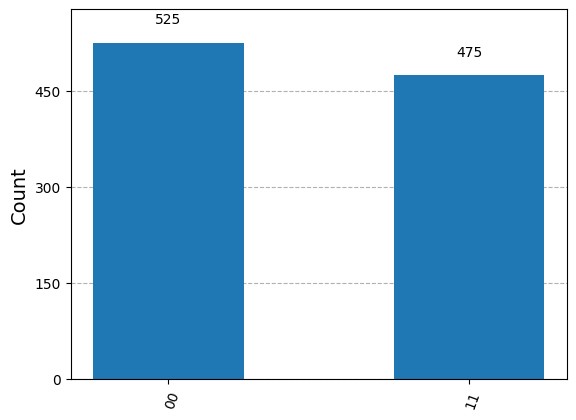

In [ ]:
from qiskit.visualization import plot_histogram
counts_aer = result_aer[0].data.meas.get_counts()
plot_histogram(counts_aer)

Jak widać, stanami końcowymi pomiaru wyjścia obwodu w bazie obliczeniowej są rzeczywiście tylko stany $\ket{0}\ket{0}$ i $\ket{1}\ket{1}$. Pomiar w bazie obliczeniowej jest równoważny pomiaroi obserwabli $Z \otimes Z$. Sampler nie daje jednak informacji o uzyskanym wyniku pomiaru, lecz tylko próbuje odtworzyć statystykę wyboru wektorów własnych mierzonej obserwabli. Więcej można się dowiedzieć korzystając z Estymatora.

## Symulacja z wykorzystaniem Estymatora


Budujemy zastaw mierzonych obserwabli.

In [ ]:
from qiskit.quantum_info import Pauli
observables = [Pauli('ZI'), Pauli('ZZ')]

### Symulator _Qiskit_Aer_

Teraz należałoby by dokonać transpliacji obwodu i mierzonych obserwabli na reprezentację wewnętrzną urządzenia kwantowego. W symulatorze _Aer_ reprezentacja wewnętrzna jest identyczna jak w _Qiskit_, więc wynik transpilacji byłby identyczny z danymi wejściowymi. Dlatego przy analizie _Estymatora_ w _Qiskit_Aer_ etap transpilacji można pominąć.

In [ ]:
from qiskit_aer.primitives import EstimatorV2 as Estimator
estimator = Estimator()
job = estimator.run([(circuit, observables)])
result=job.result()
print(result[0].data.evs)

[2.22044605e-16 1.00000000e+00]


Wizualizacja otrzymanych wyników: wyznaczone wartości oczekiwane obserwabli i odchylenia standardowe.

Expectation values  [2.22044605e-16 1.00000000e+00] Standard deviations:  [0. 0.]


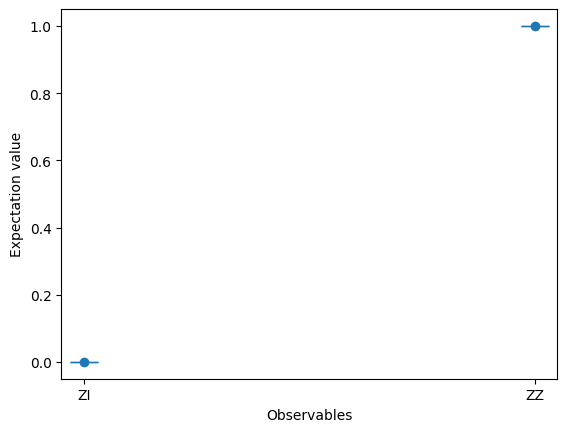

In [ ]:
import matplotlib.pyplot as plt

data = ['ZI', 'ZZ']
values = result[0].data.evs
stds = result[0].data.stds
print("Expectation values ", values, "Standard deviations: ", stds)
plt.errorbar(data, values, yerr=stds, fmt='o', capsize=10)
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()

### Komputer kwantowy

Uruchamiamy sprzęt

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service_qpu = QiskitRuntimeService()
backend_qpu = service_qpu.least_busy(operational=True, simulator=False)
print(backend_qpu.name, " num qubits:", backend_qpu.configuration().n_qubits)

ibm_kyiv  num qubits: 127


Rejestr komputera kwantowego jest złożony ze 127 qubitów. Zwykła reprezentacja macierzowa obserwabli dla takiego rejestru ma wymiar $2^{127}\times 2^{127}$. Przetwarzanie obiektów o takich rozmiarach jest w zasadzie niemożliwe. Na szczęście macierze reprezentujące bramki są rzadkie (ang. _sparse matrix_), tzn. złożone w przeważającej ilości z zer. Dla takich macierzy można opracować bardziej efektywną niż zwykła tablica reprezentację wewnętrzną danych. Temu zadaniu służy właśnie klasa `SparsePauliOp`.

In [ ]:
from qiskit.quantum_info import SparsePauliOp
# observables_sparse = SparsePauliOp.from_list([("ZI",1),("ZZ",1)])
# observables = [Pauli('ZI'), Pauli('ZZ')] # poprzednio było
observables_sparse = [SparsePauliOp('ZI'), SparsePauliOp('ZZ')]

Dla estymatora transpilacji należy poddać nie tylko obwód kwantowy, ale rownież badane obserwable. 

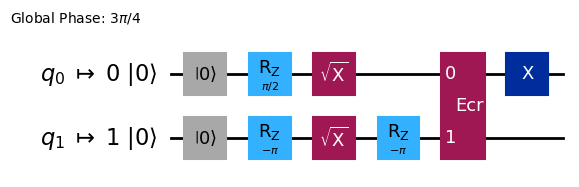

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(backend=backend_qpu, optimization_level=1)
isa_psi = pm.run(circuit)
# każdą obserwablę transpilujemy osobno
isa_observables = [observables_sparse[0].apply_layout(isa_psi.layout), observables_sparse[1].apply_layout(isa_psi.layout)] 
isa_psi.draw('mpl', initial_state=True, idle_wires=False)

In [ ]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
estimator = Estimator(mode=backend_qpu)

Wyznaczamy warości oczekiwane zadeklarowanych obserwabli na stanie wyjściowym obwodu `isa_psi` ( $\bra{\psi}(Z\otimes I)\ket{\psi}$ i $\bra{\psi}(Z\otimes Z)\ket{\psi}$), gdzie $$\ket{\psi} = CNOT_{0\to 1} (H \otimes I) \ket{0}\ket{0}.$$

In [ ]:
job_qpu = estimator.run([(isa_psi, isa_observables)])
print(job_qpu)

<RuntimeJobV2('czcmre9tp60g008hewsg', 'estimator')>


Sprawdzamy status, czekamy, sprawdzamy status, czekamy ..., wreszcie mamy status `DONE`.

In [ ]:
job_qpu.status()

'DONE'

Pobranie wyników obliczeń z komputera kwantowego

In [ ]:
print(job_qpu.result())


PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(2,), dtype=float64>), stds=np.ndarray(<shape=(2,), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(2,), dtype=float64>), shape=(2,)), metadata={'shots': 4096, 'target_precision': 0.015625, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32})], metadata={'dynamical_decoupling': {'enable': False, 'sequence_type': 'XX', 'extra_slack_distribution': 'middle', 'scheduling_method': 'alap'}, 'twirling': {'enable_gates': False, 'enable_measure': True, 'num_randomizations': 'auto', 'shots_per_randomization': 'auto', 'interleave_randomizations': True, 'strategy': 'active-accum'}, 'resilience': {'measure_mitigation': True, 'zne_mitigation': False, 'pec_mitigation': False}, 'version': 2})


In [ ]:
pub_result = job_qpu.result()[0]
print(f"Expectation values: {pub_result.data.evs}, Standard deviations: {pub_result.data.stds}")

Expectation values: [0.00349738 1.00126295], Standard deviations: [0.01667184 0.00351146]


Prezentacja wyników obliczeń w formie identycznej jak symulatora klasycznego.

Expectation values  [0.00349738 1.00126295] Standard deviations:  [0.01667184 0.00351146]


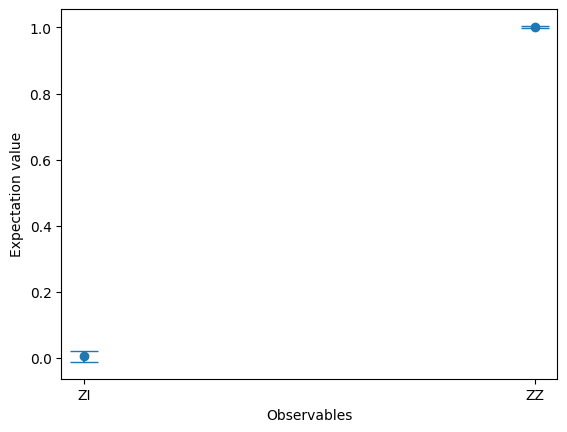

In [ ]:
data = ['ZI', 'ZZ']
values = pub_result.data.evs
stds = pub_result.data.stds
print("Expectation values ", values, "Standard deviations: ", stds)
plt.errorbar(data, values, yerr=stds, fmt='o', capsize=10)
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()